In [5]:
import os 
from matplotlib import pyplot as plt
from natsort import natsorted

In [7]:
ROOT_DIR = "../../output/20240811/val_unslpash-trainset/1.0/no_consistnacy"

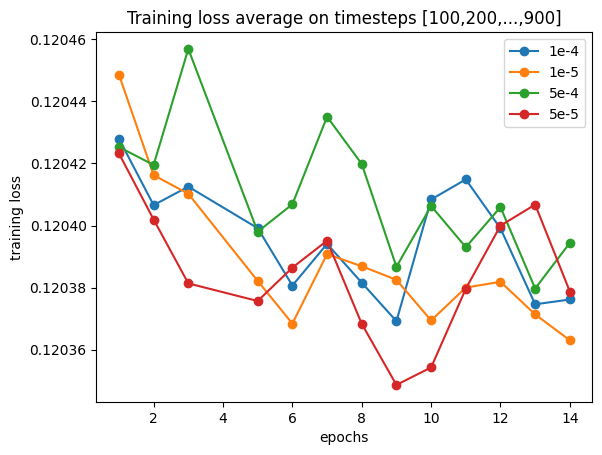

In [25]:
LRs = natsorted(os.listdir(ROOT_DIR))  
for lr in LRs:
    checkpoints = natsorted(os.listdir(os.path.join(ROOT_DIR, lr)))
    checkpoint_id = []
    avg_losses = []
    for checkpoint in checkpoints:
        # read all text files in directory and average to single float
        all_losses = []
        step_root_dir = os.path.join(ROOT_DIR, lr, checkpoint, 'lightning_logs/version_0/train_loss')
        step_dirs = natsorted(os.listdir(step_root_dir))
        for step_id in step_dirs:     
            for file in os.listdir(os.path.join(step_root_dir, step_id)):
                if file.endswith(".txt"):
                    with open(os.path.join(step_root_dir, step_id, file), 'r') as f:
                        all_losses.append(float(f.read()))       
        avg_loss = sum(all_losses) / len(all_losses)
        avg_losses.append(avg_loss)
        checkpoint_id.append(int(checkpoint.replace("chk",""))+1)
    plt.plot(checkpoint_id, avg_losses, 'o-', label=lr)
    plt.legend()        
    plt.xlabel("epochs")
    plt.ylabel("training loss")
    plt.title("Training loss average on timesteps [100,200,...,900]")